In [43]:
import pandas as pd
from sklearn.preprocessing import KBinsDiscretizer
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

In [24]:
df = pd.read_excel('WMA pneumonia cocci with weather data_annual avg reset.xlsx')

In [25]:
df

,Date,Average of Temperature mean (⁰F),Average of RH max (%),Average of Peak Wind max (mph),WMA Positivity Rate(variable days),Total Encounters,Tested Encouters,Positive Encounters,Rolling days(Tested Encounters),Rolling days(Positive Encounter),...,30 day avg. wind,7 day avg. temp,7 day avg. humidity,7 day avg. wind,30 day tested,30 day positive,30 day positivity %,7 day tested,7 day positive,7 day positivity %
0,2020-01-01,47.435897,81.461538,9.547059,0.000000,25.0,1.0,0.0,1.0,0.0,...,9.547059,47.435897,81.461538,9.547059,1,0,0.000000,1,0,0.000000
1,2020-01-02,48.700000,87.650000,13.594118,0.000000,29.0,0.0,0.0,1.0,0.0,...,11.570588,48.067949,84.555769,11.570588,1,0,0.000000,1,0,0.000000
2,2020-01-03,50.100000,72.500000,11.035294,0.000000,24.0,0.0,0.0,1.0,0.0,...,11.392157,48.745299,80.537179,11.392157,1,0,0.000000,1,0,0.000000
3,2020-01-04,52.600000,72.625000,8.947059,0.000000,22.0,0.0,0.0,1.0,0.0,...,10.780882,49.708974,78.559135,10.780882,1,0,0.000000,1,0,0.000000
4,2020-01-05,54.100000,74.775000,10.117647,0.000000,20.0,0.0,0.0,1.0,0.0,...,10.648235,50.587179,77.802308,10.648235,1,0,0.000000,1,0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1283,2023-07-08,NaN,NaN,NaN,0.133333,3.0,2.0,0.0,30.0,4.0,...,NaN,NaN,NaN,NaN,30,4,0.133333,7,1,0.142857
1284,2023-07-09,NaN,NaN,NaN,0.142857,1.0,0.0,0.0,28.0,4.0,...,NaN,NaN,NaN,NaN,28,4,0.142857,6,0,0.000000
1285,2023-07-10,NaN,NaN,NaN,0.142857,5.0,1.0,0.0,28.0,4.0,...,NaN,NaN,NaN,NaN,28,4,0.142857,6,0,0.000000
1286,2023-07-11,NaN,NaN,NaN,0.137931,3.0,1.0,0.0,29.0,4.0,...,NaN,NaN,NaN,NaN,29,4,0.137931,7,0,0.000000


In [26]:
df_new = df[df['Average of Temperature mean (⁰F)'].notnull()]

In [27]:
df_new

,Date,Average of Temperature mean (⁰F),Average of RH max (%),Average of Peak Wind max (mph),WMA Positivity Rate(variable days),Total Encounters,Tested Encouters,Positive Encounters,Rolling days(Tested Encounters),Rolling days(Positive Encounter),...,30 day avg. wind,7 day avg. temp,7 day avg. humidity,7 day avg. wind,30 day tested,30 day positive,30 day positivity %,7 day tested,7 day positive,7 day positivity %
0,2020-01-01,47.435897,81.461538,9.547059,0.000000,25.0,1.0,0.0,1.0,0.0,...,9.547059,47.435897,81.461538,9.547059,1,0,0.000000,1,0,0.000000
1,2020-01-02,48.700000,87.650000,13.594118,0.000000,29.0,0.0,0.0,1.0,0.0,...,11.570588,48.067949,84.555769,11.570588,1,0,0.000000,1,0,0.000000
2,2020-01-03,50.100000,72.500000,11.035294,0.000000,24.0,0.0,0.0,1.0,0.0,...,11.392157,48.745299,80.537179,11.392157,1,0,0.000000,1,0,0.000000
3,2020-01-04,52.600000,72.625000,8.947059,0.000000,22.0,0.0,0.0,1.0,0.0,...,10.780882,49.708974,78.559135,10.780882,1,0,0.000000,1,0,0.000000
4,2020-01-05,54.100000,74.775000,10.117647,0.000000,20.0,0.0,0.0,1.0,0.0,...,10.648235,50.587179,77.802308,10.648235,1,0,0.000000,1,0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1271,2023-06-26,91.225000,20.975000,15.885714,0.068966,5.0,1.0,0.0,29.0,2.0,...,17.072336,86.635256,24.222894,15.710144,29,2,0.068966,8,0,0.000000
1272,2023-06-27,89.550000,24.125000,18.962857,0.100000,4.0,1.0,1.0,30.0,3.0,...,17.164333,87.110256,22.990751,15.896675,30,3,0.100000,8,1,0.125000
1273,2023-06-28,87.871795,30.871795,19.326471,0.133333,4.0,1.0,1.0,30.0,4.0,...,17.128255,87.253114,22.770971,16.159700,30,4,0.133333,7,2,0.285714
1274,2023-06-29,87.650000,26.675000,15.248571,0.129032,5.0,1.0,0.0,31.0,4.0,...,16.961345,87.445971,23.310256,15.996435,31,4,0.129032,6,2,0.333333


In [28]:
df_new = df_new[df_new['WMA Positivity Rate(variable days)'].notnull()]

In [29]:
df_new

,Date,Average of Temperature mean (⁰F),Average of RH max (%),Average of Peak Wind max (mph),WMA Positivity Rate(variable days),Total Encounters,Tested Encouters,Positive Encounters,Rolling days(Tested Encounters),Rolling days(Positive Encounter),...,30 day avg. wind,7 day avg. temp,7 day avg. humidity,7 day avg. wind,30 day tested,30 day positive,30 day positivity %,7 day tested,7 day positive,7 day positivity %
0,2020-01-01,47.435897,81.461538,9.547059,0.000000,25.0,1.0,0.0,1.0,0.0,...,9.547059,47.435897,81.461538,9.547059,1,0,0.000000,1,0,0.000000
1,2020-01-02,48.700000,87.650000,13.594118,0.000000,29.0,0.0,0.0,1.0,0.0,...,11.570588,48.067949,84.555769,11.570588,1,0,0.000000,1,0,0.000000
2,2020-01-03,50.100000,72.500000,11.035294,0.000000,24.0,0.0,0.0,1.0,0.0,...,11.392157,48.745299,80.537179,11.392157,1,0,0.000000,1,0,0.000000
3,2020-01-04,52.600000,72.625000,8.947059,0.000000,22.0,0.0,0.0,1.0,0.0,...,10.780882,49.708974,78.559135,10.780882,1,0,0.000000,1,0,0.000000
4,2020-01-05,54.100000,74.775000,10.117647,0.000000,20.0,0.0,0.0,1.0,0.0,...,10.648235,50.587179,77.802308,10.648235,1,0,0.000000,1,0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1271,2023-06-26,91.225000,20.975000,15.885714,0.068966,5.0,1.0,0.0,29.0,2.0,...,17.072336,86.635256,24.222894,15.710144,29,2,0.068966,8,0,0.000000
1272,2023-06-27,89.550000,24.125000,18.962857,0.100000,4.0,1.0,1.0,30.0,3.0,...,17.164333,87.110256,22.990751,15.896675,30,3,0.100000,8,1,0.125000
1273,2023-06-28,87.871795,30.871795,19.326471,0.133333,4.0,1.0,1.0,30.0,4.0,...,17.128255,87.253114,22.770971,16.159700,30,4,0.133333,7,2,0.285714
1274,2023-06-29,87.650000,26.675000,15.248571,0.129032,5.0,1.0,0.0,31.0,4.0,...,16.961345,87.445971,23.310256,15.996435,31,4,0.129032,6,2,0.333333


In [30]:
positivity_rate_list = df_new['WMA Positivity Rate(variable days)'].tolist()

In [31]:
print(positivity_rate_list)

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.16666666666666666, 0.16666666666666666, 0.16666666666666666, 0.16666666666666666, 0.16666666666666666, 0.2857142857142857, 0.2857142857142857, 0.2857142857142857, 0.25, 0.25, 0.25, 0.2222222222222222, 0.2222222222222222, 0.2222222222222222, 0.2222222222222222, 0.2727272727272727, 0.25, 0.25, 0.2727272727272727, 0.25, 0.25, 0.23076923076923078, 0.21428571428571427, 0.21428571428571427, 0.2, 0.2, 0.23076923076923078, 0.23076923076923078, 0.23076923076923078, 0.23076923076923078, 0.14285714285714285, 0.13333333333333333, 0.13333333333333333, 0.13333333333333333, 0.1875, 0.125, 0.125, 0.125, 0.13333333333333333, 0.13333333333333333, 0.13333333333333333, 0.13333333333333333, 0.125, 0.11764705882352941, 0.11764705882352941, 0.0625, 0.0625, 0.058823529411764705, 0.058823529411764705, 0.0625, 0.058823529411764705, 0.05555555555555555, 0.05555555555555555, 0.05555555555555555, 0.0625, 0.0625, 0.058823529411764705, 0.0588235294117647

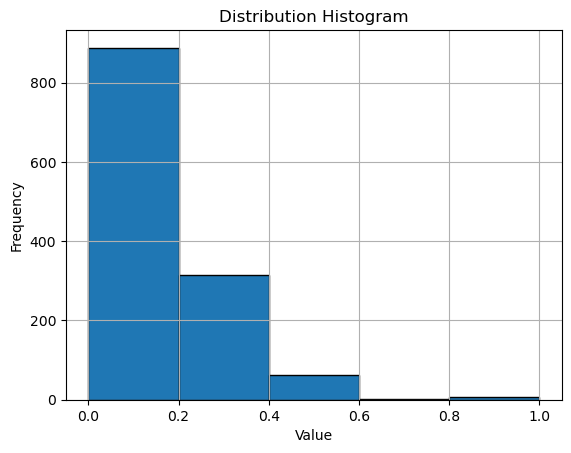

In [45]:
plt.hist(positivity_rate_list, bins=5, edgecolor='black')  # You can adjust the number of bins as needed
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Distribution Histogram')
plt.grid(True)
plt.show()

Equal interval

In [32]:
df_category_equal = pd.DataFrame(positivity_rate_list, columns=['value'])

# Initialize the KBinsDiscretizer
discretizer = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='uniform')

# Fit and transform the 'value' column
binned_values = discretizer.fit_transform(df_category_equal[['value']])

# Add the binned values to the DataFrame
df_category_equal['equal'] = binned_values.squeeze().astype(int)

print(df_category_equal)

         value  equal
0     0.000000      0
1     0.000000      0
2     0.000000      0
3     0.000000      0
4     0.000000      0
...        ...    ...
1268  0.068966      0
1269  0.100000      0
1270  0.133333      0
1271  0.129032      0
1272  0.137931      0

[1273 rows x 2 columns]


<AxesSubplot:xlabel='value', ylabel='equal'>

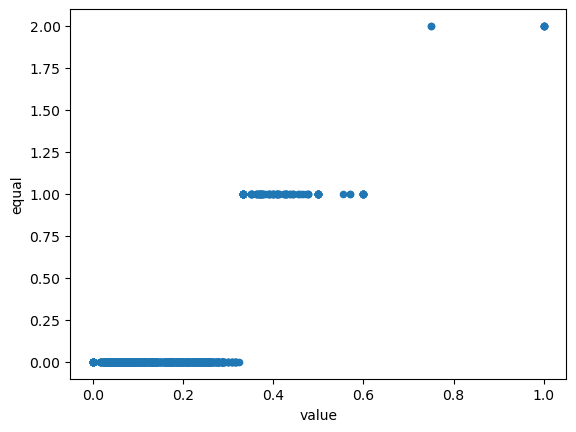

In [33]:
df_category_equal.plot.scatter(x='value', y = 'equal')

Quantile

In [34]:
df_category_quantile = pd.DataFrame(positivity_rate_list, columns=['value'])

# Initialize the KBinsDiscretizer
discretizer = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='quantile')

# Fit and transform the 'value' column
binned_values = discretizer.fit_transform(df_category_equal[['value']])

# Add the binned values to the DataFrame
df_category_quantile['quantile'] = binned_values.squeeze().astype(int)

print(df_category_quantile)

         value  quantile
0     0.000000         0
1     0.000000         0
2     0.000000         0
3     0.000000         0
4     0.000000         0
...        ...       ...
1268  0.068966         1
1269  0.100000         1
1270  0.133333         1
1271  0.129032         1
1272  0.137931         1

[1273 rows x 2 columns]


<AxesSubplot:xlabel='value', ylabel='quantile'>

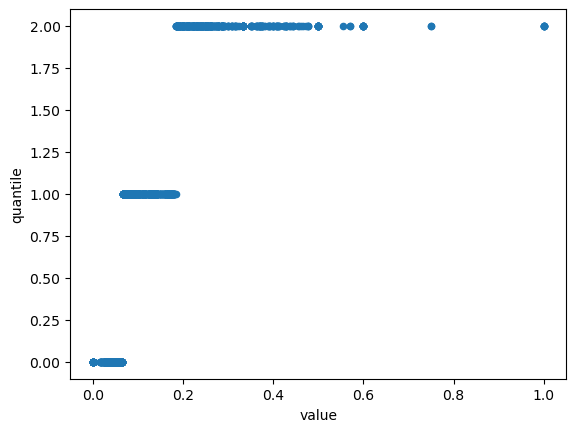

In [35]:
df_category_quantile.plot.scatter(x='value', y = 'quantile')

K-means

In [40]:
df_category_kmeans = pd.DataFrame(positivity_rate_list, columns=['value'])

# Initialize the KBinsDiscretizer
discretizer = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='kmeans')

# Fit and transform the 'value' column
binned_values = discretizer.fit_transform(df_category_equal[['value']])

# Add the binned values to the DataFrame
df_category_kmeans['kmeans'] = binned_values.squeeze().astype(int)

print(df_category_kmeans)

         value  kmeans
0     0.000000       0
1     0.000000       0
2     0.000000       0
3     0.000000       0
4     0.000000       0
...        ...     ...
1268  0.068966       0
1269  0.100000       0
1270  0.133333       0
1271  0.129032       0
1272  0.137931       1

[1273 rows x 2 columns]


C:\Users\sjunuthu\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


<AxesSubplot:xlabel='value', ylabel='kmeans'>

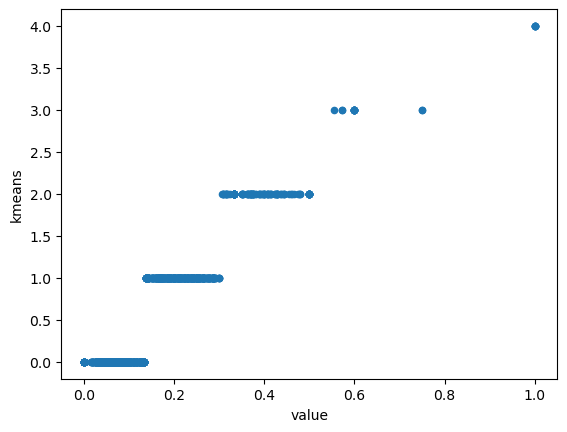

In [41]:
df_category_kmeans.plot.scatter(x='value', y = 'kmeans')

In [42]:
silhouette_avg = silhouette_score(df_category_kmeans[['value']], df_category_kmeans['kmeans'])
print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.6254171302285213
